In [2]:
%matplotlib inline
from IPython.core.display import HTML
from IPython.display import YouTubeVideo
from pandas_datareader import data, wb
from IPython.display import display
from IPython.display import Image

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path1 = os.path.join(os.getcwd(),'style-table.css')
path2 = os.path.join(os.getcwd(),'style-notebook.css')

css = open(path1).read() + open(path2).read()
HTML('<style>{}</style>'.format(css))

### download data from ftp

In [3]:
import urllib.request

In [4]:
#urllib.request.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt','stations.txt')

In [5]:
open('stations.txt','r').readlines()[0:10]

['ACW00011604  17.1167  -61.7833   10.1    ST JOHNS COOLIDGE FLD                       \n',
 'ACW00011647  17.1333  -61.7833   19.2    ST JOHNS                                    \n',
 'AE000041196  25.3330   55.5170   34.0    SHARJAH INTER. AIRP            GSN     41196\n',
 'AEM00041194  25.2550   55.3640   10.4    DUBAI INTL                             41194\n',
 'AEM00041217  24.4330   54.6510   26.8    ABU DHABI INTL                         41217\n',
 'AEM00041218  24.2620   55.6090  264.9    AL AIN INTL                            41218\n',
 'AF000040930  35.3170   69.0170 3366.0    NORTH-SALANG                   GSN     40930\n',
 'AFM00040938  34.2100   62.2280  977.2    HERAT                                  40938\n',
 'AFM00040948  34.5660   69.2120 1791.3    KABUL INTL                             40948\n',
 'AFM00040990  31.5000   65.8500 1010.0    KANDAHAR AIRPORT                       40990\n']

In [6]:
# add all gsm stations into a dictionary
# index = station code, value = station name + last number

stations = {}

for line in open('stations.txt','r').readlines():
    if 'GSN' in line:
        stations[line.split()[0]] = ' '.join(line.split()[4:])

In [7]:
len(stations)

994

In [8]:
stations

{'AE000041196': 'SHARJAH INTER. AIRP GSN 41196',
 'AF000040930': 'NORTH-SALANG GSN 40930',
 'AG000060390': 'ALGER-DAR EL BEIDA GSN 60390',
 'AG000060590': 'EL-GOLEA GSN 60590',
 'AG000060611': 'IN-AMENAS GSN 60611',
 'AG000060680': 'TAMANRASSET GSN 60680',
 'AJ000037989': 'ASTARA GSN 37989',
 'ALM00013615': 'TIRANA RINAS GSN 13615',
 'AM000037781': 'ARAGAC VISOKOGORNAYA GSN 37781',
 'AO000066160': 'LUANDA GSN 66160',
 'AO000066270': 'WAKU KUNGU (CELA) GSN 66270',
 'AO000066390': 'LUBANGO (SA DA BAND GSN 66390',
 'AO000066410': 'MENONGUE (SERPA PIN GSN 66410',
 'AO000066422': 'MOCAMEDES GSN 66422',
 'AO000066447': 'MAVINGA GSN 66447',
 'AQW00061705': 'AS PAGO PAGO WSO AP GSN 91765',
 'AR000087007': 'LA QUIACA OBSERVATO GSN 87007',
 'AR000087065': 'RIVADAVIA GSN 87065',
 'AR000087078': 'LAS LOMITAS GSN 87078',
 'AR000087155': 'RESISTENCIA AERO GSN 87155',
 'AR000087217': 'LA RIOJA AERO. GSN 87217',
 'AR000087257': 'CERES AERO GSN 87257',
 'AR000087270': 'RECONQUISTA AERO GSN 87270',
 'AR

In [9]:
# check for a string in values and print it, if found

def findstation(s):
    for key,value in stations.items():
        if s in value:
            print(key,value)

In [10]:
findstation('SAN DIEGO')

USW00023188 CA SAN DIEGO LINDBERGH FLD GSN 72290


In [11]:
findstation('MINNEAPOLIS')

USW00014922 MN MINNEAPOLIS/ST PAUL AP GSN HCN 72658


In [12]:
findstation('LIHUE')

USW00022536 HI LIHUE WSO AP 1020.1 GSN 91165


In [13]:
findstation('IRKUTSK')

RSM00030710 IRKUTSK GSN 30710


In [14]:
# add data from these four stations into a list
datastations = ['USW00023188','USW00014922','USW00022536','RSM00030710']

### parse text file into a numpy record array

In [15]:
# open USW00022536.dly and look at first 5 lines
# we see station code, temperatures, observations etc

open('USW00022536.dly','r').readlines()[:5]

['USW00022536195002TMAX  256  0  256  0  256  0  267  0  217  0  228  0  256  0  272  0  256  0  256  0  256  0  244  0  256  0  256  0  244  0  244  0  250  0  256  0  239  0  250  0  256  0  256  0  267  0  261  0  267  0  267  0  261  0  261  0-9999   -9999   -9999   \n',
 'USW00022536195002TMIN  178  0  156  0  161  0  167  0  167  0  167  0  189  0  211  0  206  0  217  0  217  0  211  0  200  0  200  0  206  0  183  0  206  0  206  0  206  0  194  0  206  0  200  0  206  0  200  0  211  0  183  0  172  0  200  0-9999   -9999   -9999   \n',
 'USW00022536195002PRCP    0  0    0  0    0  0    0  0  737  0  406  0   36  0   38  0    0T 0    0T 0    0  0    0T 0   18  0    5  0   10  0   18  0   15  0    5  0    0T 0    0T 0   23  0   10  0    3  0   48  0    0T 0    0T 0    0T 0    5  0-9999   -9999   -9999   \n',
 'USW00022536195002SNOW    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0

In [16]:
# string index numbers for lines above
open('stations-readme.txt','r').readlines()[98:121]

['------------------------------\n',
 'Variable   Columns   Type\n',
 '------------------------------\n',
 'ID            1-11   Character\n',
 'YEAR         12-15   Integer\n',
 'MONTH        16-17   Integer\n',
 'ELEMENT      18-21   Character\n',
 'VALUE1       22-26   Integer\n',
 'MFLAG1       27-27   Character\n',
 'QFLAG1       28-28   Character\n',
 'SFLAG1       29-29   Character\n',
 'VALUE2       30-34   Integer\n',
 'MFLAG2       35-35   Character\n',
 'QFLAG2       36-36   Character\n',
 'SFLAG2       37-37   Character\n',
 '  .           .          .\n',
 '  .           .          .\n',
 '  .           .          .\n',
 'VALUE31    262-266   Integer\n',
 'MFLAG31    267-267   Character\n',
 'QFLAG31    268-268   Character\n',
 'SFLAG31    269-269   Character\n',
 '------------------------------\n']

In [17]:
dly_delimiter = [11,4,2,4] + [5,1,1,1] * 31
dly_usecols = [1,2,3] + [4*1 for i in range(1,32)]
dly_dtype = [np.int32,np.int32,(np.str_,4)] + [np.int32] * 31
dly_names = ['year','month','obs'] + [str(day) for day in range(1,31+1)]

def parsefile(filename):
    return np.genfromtxt(filename,
                         delimiter = dly_delimiter,
                         usecols = dly_usecols,
                         dtype = dly_dtype,
                         names = dly_names)

In [18]:
lihue = parsefile('USW00022536.dly')

In [19]:
# we have a complicated numpy record array
lihue[:2]

array([ (1950, 2, 'TMAX', 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256, 256),
       (1950, 2, 'TMIN', 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178, 178)], 
      dtype=[('year', '<i4'), ('month', '<i4'), ('obs', '<U4'), ('1', '<i4'), ('2', '<i4'), ('3', '<i4'), ('4', '<i4'), ('5', '<i4'), ('6', '<i4'), ('7', '<i4'), ('8', '<i4'), ('9', '<i4'), ('10', '<i4'), ('11', '<i4'), ('12', '<i4'), ('13', '<i4'), ('14', '<i4'), ('15', '<i4'), ('16', '<i4'), ('17', '<i4'), ('18', '<i4'), ('19', '<i4'), ('20', '<i4'), ('21', '<i4'), ('22', '<i4'), ('23', '<i4'), ('24', '<i4'), ('25', '<i4'), ('26', '<i4'), ('27', '<i4'), ('28', '<i4'), ('29', '<i4'), ('30', '<i4'), ('31', '<i4')])

In [20]:
# we treat the data into a better form
def unroll(record):
    startdate = np.datetime64( '{}-{:02}'.format( record['year'] , record['month']) )
    
    dates = np.arange( startdate , 
                       startdate + np.timedelta64(1,'M'), 
                       np.timedelta64(1,'D') )
    rows = []
    
    for i,date in enumerate(dates):
        rows.append( (date,record[str(i+1)]/10) )
    
    rows = np.array(rows,dtype=[('date','M8[D]'),('value','d')])
    
    return rows

In [21]:
unroll(lihue[0])[:5]

array([(datetime.date(1950, 2, 1), 25.6),
       (datetime.date(1950, 2, 2), 25.6),
       (datetime.date(1950, 2, 3), 25.6),
       (datetime.date(1950, 2, 4), 25.6), (datetime.date(1950, 2, 5), 25.6)], 
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [22]:
def getobs(filename,obs):
    
    results = []
    
    for row in parsefile(filename):
        if row[2] == obs:
            results.append(unroll(row))
            
    return np.concatenate(results)
 

In [23]:
getobs('USW00022536.dly','TMIN')

array([(datetime.date(1950, 2, 1), 17.8),
       (datetime.date(1950, 2, 2), 17.8),
       (datetime.date(1950, 2, 3), 17.8), ...,
       (datetime.date(2015, 9, 28), 25.0),
       (datetime.date(2015, 9, 29), 25.0),
       (datetime.date(2015, 9, 30), 25.0)], 
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

### integrating missing data

In [24]:
lihue_tmin = getobs('USW00022536.dly','TMIN')
lihue_tmax = getobs('USW00022536.dly','TMAX')

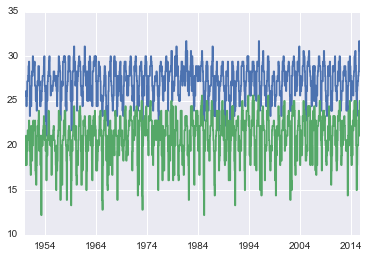

In [25]:
plt.plot(lihue_tmax['date'],lihue_tmax['value'])
plt.plot(lihue_tmin['date'],lihue_tmin['value'])

In [28]:
np.mean(lihue_tmin['value']),np.mean(lihue_tmax['value'],)

(21.016720176791893, 27.300133427844727)

### smoothing the data

In [30]:
def plot_smoothed(t,win=10):
    smoothed = np.correlate(t['value'],np.ones(win)/win,'same')
    plt.plot(t['date'],smoothed)

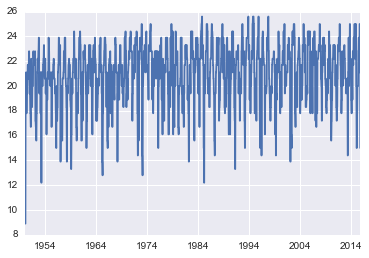

In [31]:
plot_smoothed(lihue_tmin)

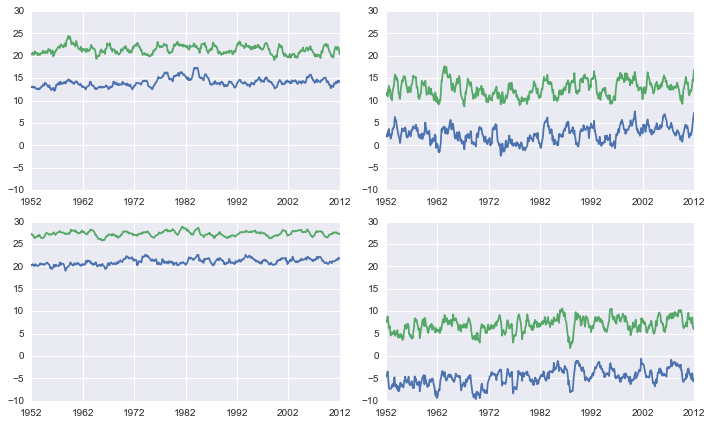

In [35]:
plt.figure(figsize=(10,6))

for i,code in enumerate(datastations):
    
    plt.subplot(2,2,i+1)
    
    plot_smoothed(getobs('{}.dly'.format(code),'TMIN'),365)
    plot_smoothed(getobs('{}.dly'.format(code),'TMAX'),365)
    
    plt.title(stations[code])
    
    plt.axis(xmin=np.datetime64('1952'),xmax=np.datetime64('2012'),ymin=-10,ymax=30)
    
plt.tight_layout()

### plotting historical records

In [39]:
# re-cast data as 2d array, each row is a year, each column a day

def select_year(data,year):
    
    start = np.datetime64('{}'.format(year))
    end = start+ np.timedelta64(1,'Y')
    
    return data[(data['date'] >= start) & (data['date'] < end)]['value']

In [42]:
select_year(lihue_tmin,1951)[:20]

array([ 17.8,  17.8,  17.8,  17.8,  17.8,  17.8,  17.8,  17.8,  17.8,
        17.8,  17.8,  17.8,  17.8,  17.8,  17.8,  17.8,  17.8,  17.8,
        17.8,  17.8])

In [51]:
a = []
b = []

for year in range(1951,2014+1):
    a.append(select_year(lihue_tmin,year)[:365])
    
for year in range(1951,2014+1):
    b.append(select_year(lihue_tmax,year)[:365])
    

In [52]:
lihue_tmin_all = np.vstack(a)
lihue_tmin_all

array([[ 17.8,  17.8,  17.8, ...,  22.8,  22.8,  22.8],
       [ 17.2,  17.2,  17.2, ...,  21.1,  21.1,  21.1],
       [ 17.8,  17.8,  17.8, ...,  22.2,  22.2,  22.2],
       ..., 
       [ 17.8,  17.8,  17.8, ...,  19.4,  19.4,  19.4],
       [ 20. ,  20. ,  20. , ...,  18.9,  18.9,  18.9],
       [ 17.8,  17.8,  17.8, ...,  20. ,  20. ,  20. ]])

In [53]:
lihue_tmax_all = np.vstack(b)
lihue_tmax_all

array([[ 25.6,  25.6,  25.6, ...,  26.7,  26.7,  26.7],
       [ 26.7,  26.7,  26.7, ...,  24.4,  24.4,  24.4],
       [ 24.4,  24.4,  24.4, ...,  26.1,  26.1,  26.1],
       ..., 
       [ 25. ,  25. ,  25. , ...,  27.2,  27.2,  27.2],
       [ 23.9,  23.9,  23.9, ...,  25. ,  25. ,  25. ],
       [ 26.1,  26.1,  26.1, ...,  26.1,  26.1,  26.1]])

In [47]:
lihue_tmin_all.shape

(64, 365)

In [54]:
lihue_tmax_all.shape

(64, 365)

In [48]:
lihue_tmin_recordmin = np.min(lihue_tmin_all,axis=0)
lihue_tmin_recordmax = np.max(lihue_tmin_all,axis=0)

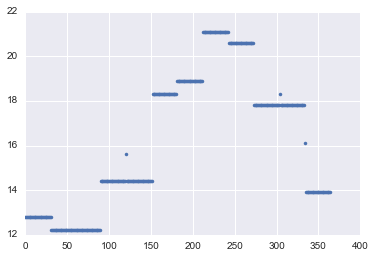

In [49]:
plt.plot(lihue_tmin_recordmin,'.')

(0.0, 365, 10.0, 35.0)

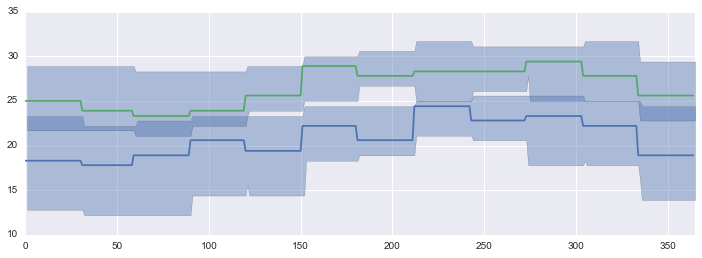

In [60]:
plt.figure(figsize=(12,4))

days = np.arange(1,365+1)

plt.fill_between(days,np.min(lihue_tmin_all,axis=0),np.max(lihue_tmin_all,axis=0),alpha=0.4)
plt.plot(select_year(lihue_tmin,2009))

plt.fill_between(days,np.min(lihue_tmax_all,axis=0),np.max(lihue_tmax_all,axis=0),alpha=0.4)
plt.plot(select_year(lihue_tmax,2009))

plt.axis(xmax=365)